In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

hb= pd.read_csv("haberman.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print(hb.shape)
print(hb.columns)
hb["status"].value_counts()

(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')


1    225
2     81
Name: status, dtype: int64

The dataset has 306 datapoints with 4 features - age,year,nodes and status.From the above results it seems like an imbalanced data set.

**Objective** :
The dataset contains cases from a study on the survival of patients who had undergone surgery for breast cancer. The objective is to determine the survival (the patient belongs to status 1 or status 2) based on the age,year,nodes independent variables

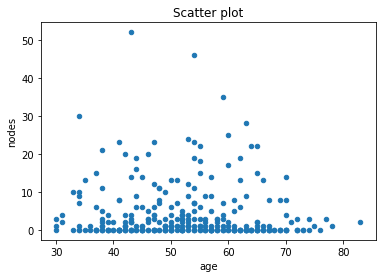

In [ ]:

hb.plot(kind='scatter', x='age', y='nodes') ;
plt.title('Scatter plot')
plt.show()

Most of the nodes are ranging from 0 to 25 and age is ranging between 30 to 80

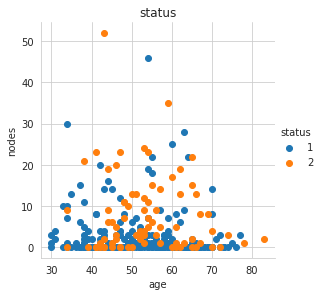

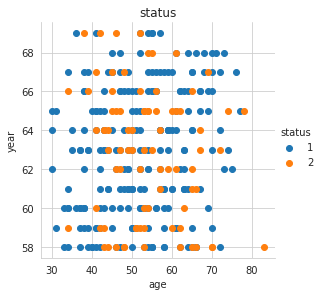

In [ ]:

sns.set_style("whitegrid")
sns.FacetGrid(hb,hue="status",height=4)\
   .map(plt.scatter,"age","nodes")\
   .add_legend();

plt.title("status")
plt.show()

sns.set_style("whitegrid")
sns.FacetGrid(hb,hue="status",height=4)\
   .map(plt.scatter,"age","year")\
   .add_legend();

plt.title("status")
plt.show()

Irrespective of year and number of nodes, if the patients’s age is between 30 to 40 there are high chances of her survival.

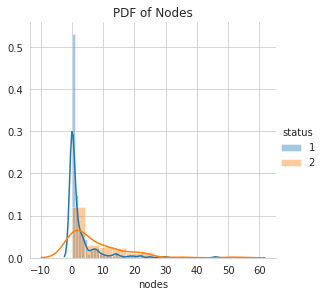

In [ ]:
sns.FacetGrid(hb, hue="status", height=4) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('PDF of Nodes')
plt.show();


When number of nodes are less than 2 there is high chance of survival

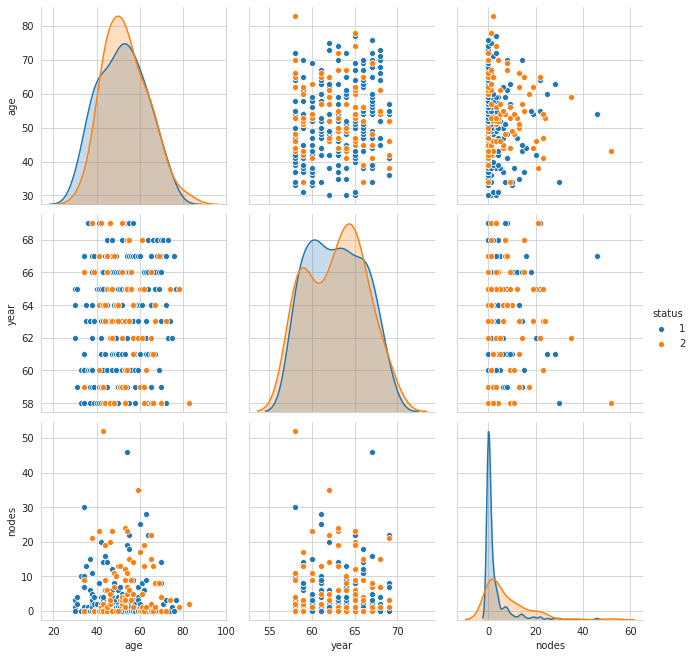

In [ ]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hb, hue="status", height=3);
plt.title('pair-plot');
plt.show()

Nodes help us in differentiating the points better than age and year

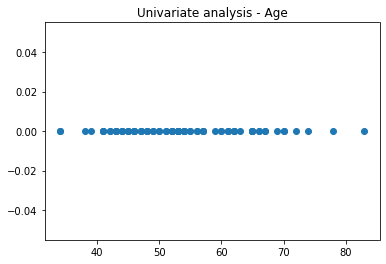

In [ ]:
import numpy as np
hb_status1 = hb.loc[hb["status"] == 1];
hb_status2 = hb.loc[hb["status"] == 2];


plt.plot(hb_status2["age"], np.zeros_like(hb_status2['age']), 'o')
plt.title('Univariate analysis - Age')
plt.show()


Deaths are more when the age is between 42 to 58

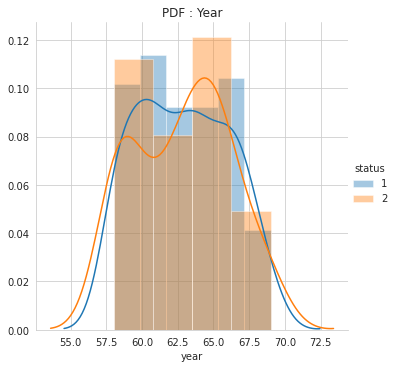

In [ ]:
sns.FacetGrid(hb, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title('PDF : Year')
plt.show();


[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


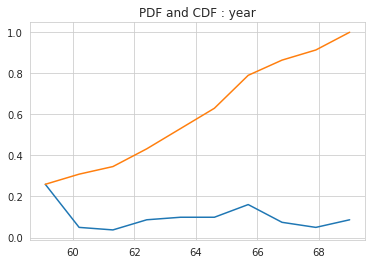

In [ ]:
counts, bin_edges = np.histogram(hb_status2['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.title('PDF and CDF : year')
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);

Deaths are more in year 62 to 66

In [ ]:
print("Means:")
print(np.mean(hb_status1["nodes"]))
#Mean with an outlier.
print(np.mean(hb_status2["nodes"]))

print("\nStd-dev:");
print(np.std(hb_status1["nodes"]))
print(np.std(hb_status2["nodes"]))

print("Means of age:")
print(np.mean(hb_status1["age"]))
#Mean with an outlier.
print(np.mean(hb_status2["age"]))

print("\nStd-dev:");
print(np.std(hb_status1["age"]))
print(np.std(hb_status2["age"]))

#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(hb_status1["nodes"]))
print(np.median(hb_status2["nodes"]))

print("\nMedians:")
print(np.median(hb_status1["age"]))
print(np.median(hb_status2["age"]))


Means:
2.7911111111111113
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632
Means of age:
52.01777777777778
53.67901234567901

Std-dev:
10.98765547510051
10.10418219303131

Medians:
0.0
4.0

Medians:
52.0
53.0


The values of mean,standard deviation and median for status 1 and status 2 are almost same for age. So age has minimal affect on survival. However the number of nodes have significant impact.

In [ ]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(hb_status1["nodes"]))
print(np.median(hb_status2["nodes"]))


print("\nQuantiles:")
print(np.percentile(hb_status1["nodes"],np.arange(0, 100, 25)))
print(np.percentile(hb_status2["nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(hb_status1["nodes"],90))
print(np.percentile(hb_status2["nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(hb_status1["nodes"]))
print(robust.mad(hb_status2["nodes"]))



Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


**Observation 1:**
The 4th quantile for status as 1 shows the value as 3. This confirms the survival rate is high when nodes are less than 4. 

**Observation 2:**
The 90th percentile for status 1 shows the value 8, so survival rate is higher when nodes are less than 10. 

**Observation 3:**
The IQR for status 2 is 10 so 50% of points lie between 1 to 10

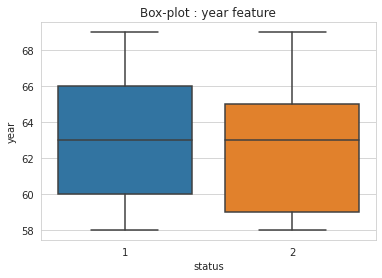

In [ ]:
sns.boxplot(x='status',y='year', data=hb)
plt.title('Box-plot : year feature')
plt.show()

The difference between 75th percentile and 50th percentile for status 2 is less and is between 63 to 65 year. This confirms most of the deaths happened between 62 to 65

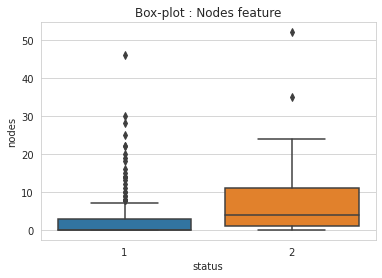

In [ ]:
sns.boxplot(x='status',y='nodes', data=hb)
plt.title('Box-plot : Nodes feature')
plt.show()

Most of the people who survived have nodes less than 2 but 25% of the people who did not survive also has nodes less than 4. So this condition might become false for 25% of people with status 2.

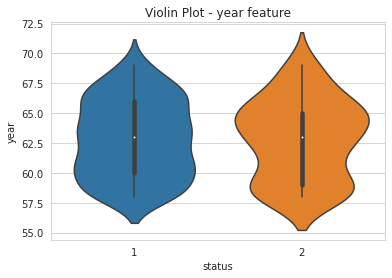

In [ ]:
sns.violinplot(x="status",y="year",data=hb,size=8)
plt.title('Violin Plot - year feature')
plt.show()

The plot is wider for status 2 between the year 62 to 66. The plot is wider for status 1 between the years 58 to 62

Summary :

1) Since this is an imbalanced dataset, comparing the density of status 1 and status 2 might yield incorrect results. 

2) Nodes feature helps us in differentiating the points better than age and year feature.

3) When nodes are less than 2 the probability of person surviving for more than 5 year is higher. But due to age and year factors combined even when nodes are less than 2 there is 25% chance that person might not survive (belong to status 2)

4) The density of status 1 points are higher when 

*   Nodes are less than 2
*   Age is between 30 to 40
*   Year range between 58 to 62.

5) The density of status 2 points are higher when 

*  Nodes are more than 4  
*  Age is between 42 to 58
*  Year range between 62 to 66


6) The outliers effect seems to be minimal in this data set since mean and median are almost same for age and year. However, outliers have effected mean of nodes.
